## **Polynomial Regression**

### **Definisi**

Regresi polinomial adalah metode untuk memodelkan hubungan non-linear antara fitur dan target dengan menambahkan variabel polinomial.

### **Cara Kerja**

 Menambahkan fitur polinomial ke dalam model untuk menangkap hubungan non-linear antara input dan output.

In [10]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

In [11]:
# import Dataset
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=500, n_features=5, noise=20, bias=180, random_state=42)


# split data test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


# Standarisation Data (X) train and test
SK = StandardScaler()

X_train = SK.fit_transform(X_train, y_train)
X_test = SK.transform(X_test)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# make polynomial features (X)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train, y_train)


# init instance of Model
poly_model = LinearRegression()

# train Data features (X) with Linear Regression Model
poly_model.fit(X_poly, y_train)

print(poly_model.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


Mean Squared Error: 446.3925287695746
Mean Absolute Error: 17.434087042333804


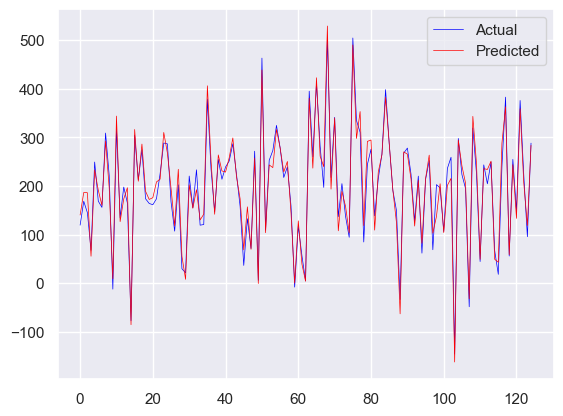

In [13]:
# predict and evalutaion
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_test_poly = poly.transform(X_test)

y_pred = poly_model.predict(X_test_poly)

# evaluate
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")


# ploting data
sns.set()

plt.plot(range(len(y_test)), y_test, label="Actual", color="Blue", linewidth=0.5)
plt.plot(range(len(y_pred)), y_pred, label="Predicted", color="Red", linewidth=0.5)
plt.legend()

plt.show()